In [2]:
import sys
sys.path.append('D:\\Git\\machine-learning')

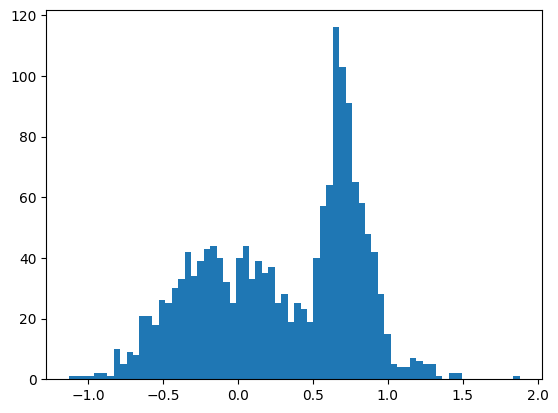

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mltools.distribution import NormalDistribution

# Create random real-world distribution
x1 = np.random.rand(500)
x2 = np.random.normal(0.7, 0.09, 430)
x3 = np.random.normal(-0.27, 0.25, 620)
x4 = np.random.normal(1,0.25,100)

x = np.concatenate([x1,x2,x3,x4])

plt.hist(x,bins=70);

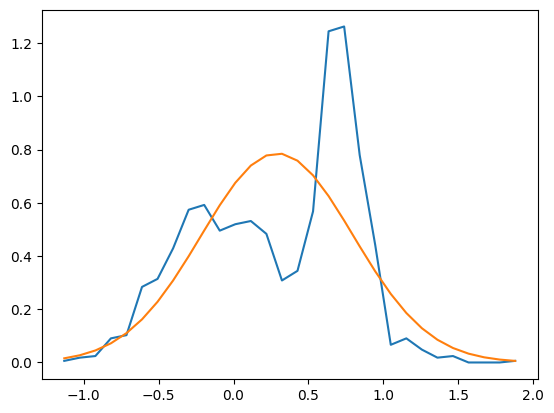

In [4]:
# Use a moving windows inerval to represent the distribution as a function of x
window_number = 30

x_min = np.min(x)
x_max = np.max(x)

x_axis = np.linspace(x_min, x_max, window_number)
ws = (x_max - x_min) / window_number

fx = []
for x_value in x_axis:
    fx.append(x[x > x_value - ws/2][x[x > x_value - ws/2] < x_value + ws/2].shape[0] / (x.shape[0] * ws))

plt.plot(x_axis, fx);
plt.plot(x_axis, NormalDistribution(np.mean(x), np.std(x)).pdf(x_axis));

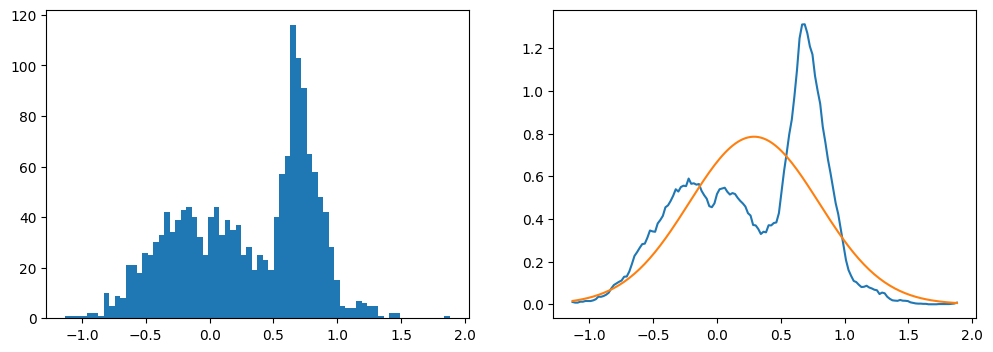

In [50]:
# Estimate PDF function
# Parameters:
#   x: the data
#   w_n: the number of windows
#   w_s: the size of windows
def estimate_PDF(x, w_s, w_n):
    x_min = np.min(x)
    x_max = np.max(x)

    x_axis = np.linspace(x_min, x_max, w_n)

    fx = []
    for x_value in x_axis:
        fx.append(x[x > x_value - w_s/2][x[x > x_value - w_s/2] < x_value + w_s/2].shape[0] / (x.shape[0] * w_s))
    return x_axis, fx


    
def estimate_smooth_PDF(x, w_n):
    x_min = np.min(x)
    x_max = np.max(x)

    interval = x_max - x_min
    x_axis = np.linspace(x_min, x_max, w_n)
    w_s_list = [1000, 950, 900, 850, 800, 750, 700, 650, 600, 550, 500, 250, 100, 75, 50, 25, 10]



    for idx, w_s in enumerate(w_s_list):
        _, fx_temp = estimate_PDF(x, interval / w_s, w_n)
        fx_temp = np.array(fx_temp)
        if idx == 0:
            fx = fx_temp
        else:
            fx = np.mean([fx, fx_temp], axis=0)
    
    return x_axis, fx

pdf_x, pdf_fx = estimate_smooth_PDF(x, 150)

fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].hist(x,bins=70);
ax[1].plot(pdf_x, pdf_fx);
ax[1].plot(pdf_x, NormalDistribution(np.mean(x), np.std(x)).pdf(pdf_x));